In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/diabetes.csv')
data


,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,35,0,33.6,0.627,50,1
1,1,85,29,0,26.6,0.351,31,0
2,8,183,0,0,23.3,0.672,32,1
3,1,89,23,94,28.1,0.167,21,0
4,0,137,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,48,180,32.9,0.171,63,0
764,2,122,27,0,36.8,0.340,27,0
765,5,121,23,112,26.2,0.245,30,0
766,1,126,0,0,30.1,0.349,47,1


In [ ]:
# number of rows and Columns in this dataset
data.shape

(768, 8)

In [ ]:
# getting the statistical measures of the data
data.describe()


,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# separating the data and labels
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  SkinThickness  Insulin   BMI  \
0              6      148             35        0  33.6   
1              1       85             29        0  26.6   
2              8      183              0        0  23.3   
3              1       89             23       94  28.1   
4              0      137             35      168  43.1   
..           ...      ...            ...      ...   ...   
763           10      101             48      180  32.9   
764            2      122             27        0  36.8   
765            5      121             23      112  26.2   
766            1      126              0        0  30.1   
767            1       93             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   

In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
# Splitting the Data into Training data & Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 7) (614, 7) (154, 7)


In [ ]:
# Multiple Models Training & Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbor": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBooster": XGBClassifier()
}

# Initialize an empty list to store F1 scores
f1_scores = []
model_names=[]
# Iterate through each model
for name, model in models.items():
    # Training the classifier
    model.fit(X_train, Y_train)

    # Predictions on training data
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(train_predictions, Y_train)

    # Predictions on test data
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(test_predictions, Y_test)

    # Calculate F1 score and append to the list
    f1 = f1_score(Y_test, test_predictions)
    f1_scores.append(f1)
    model_names.append(name)

    # Print results
    print(f"Model: {name}")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    overall_accuracy1 = ((train_accuracy + test_accuracy) / 2) * 100
    print(f"Overall accuracy: {overall_accuracy1:.2f}")
    print()



Model: Logistic Regression
Training Accuracy: 0.78
Test Accuracy: 0.77
F1 Score: 0.62
Overall accuracy: 77.81

Model: K Nearest Neighbor
Training Accuracy: 0.80
Test Accuracy: 0.75
F1 Score: 0.61
Overall accuracy: 77.56

Model: Decision Tree
Training Accuracy: 1.00
Test Accuracy: 0.67
F1 Score: 0.50
Overall accuracy: 83.44

Model: SVM
Training Accuracy: 0.76
Test Accuracy: 0.77
F1 Score: 0.56
Overall accuracy: 76.42

Model: Random Forest
Training Accuracy: 1.00
Test Accuracy: 0.73
F1 Score: 0.57
Overall accuracy: 86.36

Model: XGBooster
Training Accuracy: 1.00
Test Accuracy: 0.73
F1 Score: 0.59
Overall accuracy: 86.69



XGBooster

In [ ]:
# Model Training & Evaluation
classifier = XGBClassifier()

#training the XG Booster  Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

overall_accuracy = ((training_data_accuracy + test_data_accuracy) / 2) * 100
print('Overall accuracy: ', overall_accuracy)

# Confusion Matrix
conf_matrix_test = confusion_matrix(Y_test, X_test_prediction)
print('Confusion Matrix', conf_matrix_test)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.7337662337662337
Overall accuracy:  86.68831168831169
Confusion Matrix [[83 17]
 [24 30]]


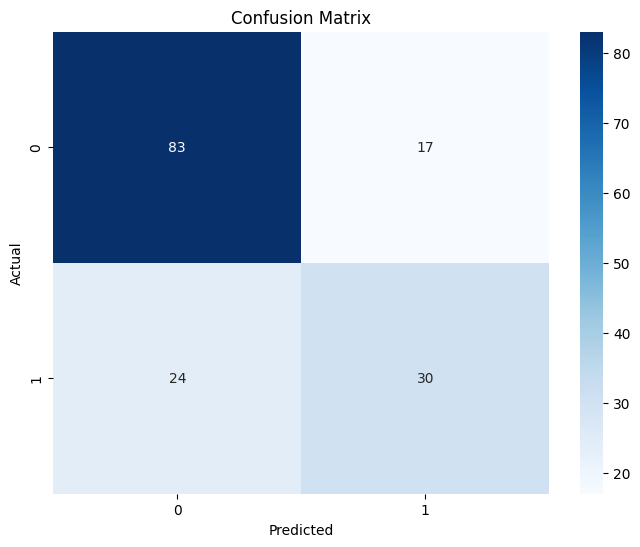

In [ ]:
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Predictive System**

In [ ]:
input_data = (8,183,0,0,23.3,0.672,32)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction =  classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[1]
The person is diabetic


**Saving the trained model**

In [ ]:
import pickle

In [ ]:
filename = 'diabetes.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
diabetes_model = pickle.load(open('diabetes.sav', 'rb'))

In [ ]:
input_data = (8,183,0,0,23.3,0.672,32)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [ ]:
data.head(10)


,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,35,0,33.6,0.627,50,1
1,1,85,29,0,26.6,0.351,31,0
2,8,183,0,0,23.3,0.672,32,1
3,1,89,23,94,28.1,0.167,21,0
4,0,137,35,168,43.1,2.288,33,1
5,5,116,0,0,25.6,0.201,30,0
6,3,78,32,88,31.0,0.248,26,1
7,10,115,0,0,35.3,0.134,29,0
8,2,197,45,543,30.5,0.158,53,1
9,8,125,0,0,0.0,0.232,54,1


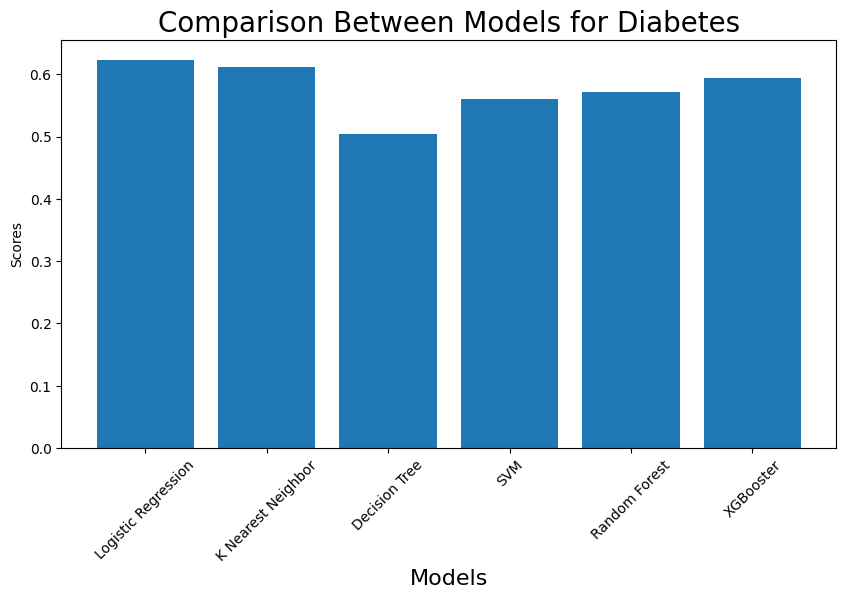

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
ax.bar(model_names, f1_scores)

# Set the title and axis labels
ax.set_title('Comparison Between Models for Diabetes', fontsize=20)
ax.set_xlabel('Models', fontsize=16)
ax.set_ylabel('Scores', fontsize=10)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.2)

# Display the plot
plt.show()